In [0]:
!pip install tensorflow

In [0]:
!pip install keras

     |████████████████████████████████| 378kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 276kB 20.0MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=b59051586646292b7e78eeb0af9d710e06fbf90bace75579ad9b042541b8ff81
  Stored in directory: /home/jovyan/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
import tensorflow as tf
import os

print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


# Data

In [0]:
from tensorflow.keras.utils import to_categorical

## Mnist

In [0]:
from keras.datasets import mnist
(mnist_train, mnist_train_labels_sparse), (mnist_test, mnist_test_labels_sparse) = mnist.load_data()

Using TensorFlow backend.
11493376/11490434 [==============================] - 0s 0us/step


In [0]:
mnist_train_norm = mnist_train.astype('float32') / 255
mnist_test_norm = mnist_test.astype('float32') / 255

mnist_train_labels = to_categorical(mnist_train_labels_sparse)
mnist_test_labels = to_categorical(mnist_test_labels_sparse)

## Fashion Mnist

In [0]:
from keras.datasets import fashion_mnist
(fmnist_train, fmnist_train_labels_sparse), (fmnist_test, fmnist_test_labels_sparse) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
mnist_train_norm = mnist_train.astype('float32') / 255
mnist_test_norm = mnist_test.astype('float32') / 255

mnist_train_labels = to_categorical(mnist_train_labels_sparse)
mnist_test_labels = to_categorical(mnist_test_labels_sparse)

## Cifar

In [0]:
from tensorflow.keras.datasets import cifar10
(cifar_train, cifar_train_labels_sparse), (cifar_test, cifar_test_labels_sparse) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
cifar_train_norm = cifar_train.astype('float32') / 255
cifar_test_norm = cifar_test.astype('float32') / 255

cifar_train_labels = to_categorical(cifar_train_labels_sparse)
cifar_test_labels = to_categorical(cifar_test_labels_sparse)

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, UpSampling2D, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np

import time
from timeit import default_timer as timer
from datetime import timedelta

# Basic feed-forward model

In [0]:
# define a model

def modelSimpleNN():
  model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
  ])
  
  return model

In [0]:
# compile the model

model = modelSimpleNN()

learning_rate = 0.0001
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate)

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [0]:
# train it

epochs = 10
batch_size = 32

start = timer()
history = model.fit(mnist_train_norm, mnist_train_labels, batch_size=batch_size, epochs=epochs, validation_data=(mnist_test_norm, mnist_test_labels), shuffle=True)

end = timer()
print(timedelta(seconds=end-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.6186 - accuracy: 0.8451 - val_loss: 0.3148 - val_accuracy: 0.9160
Epoch 2/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2858 - accuracy: 0.9214 - val_loss: 0.2467 - val_accuracy: 0.9317
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2321 - accuracy: 0.9359 - val_loss: 0.2109 - val_accuracy: 0.9403
Epoch 4/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1985 - accuracy: 0.9453 - val_loss: 0.1858 - val_accuracy: 0.9462
Epoch 5/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1743 - accuracy: 0.9517 - val_loss: 0.1671 - val_accuracy: 0.9511
Epoch 6/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1559 - accuracy: 0.9564 - val_loss: 0.1542 - val_accuracy: 0.9556
Epoch 7/10
60000/60000 [=======================

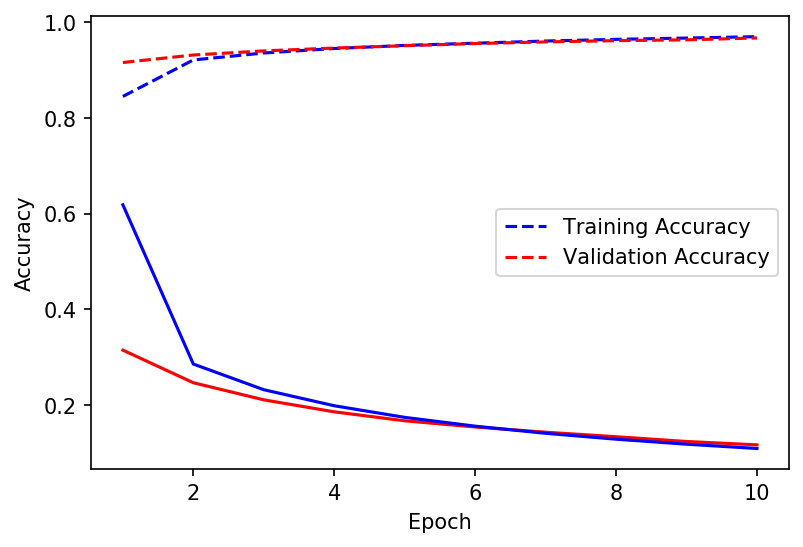

In [0]:
# visualize the training process

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

# get training and test loss histories
training_loss = history.history['loss']
training_acc = history.history['accuracy']

val_acc = history.history['val_accuracy']


# create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_acc, 'b--')
plt.plot(epoch_count, val_acc, 'r--')

test_loss = history.history['val_loss']
plt.plot(epoch_count, test_loss, 'r-')
plt.plot(epoch_count, training_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [0]:
# does it really work?

first_image = mnist_test_norm[5]

model.predict(np.array([first_image]))

array([[0.11240999, 0.13442588, 0.07650133, 0.0977638 , 0.09490833,
        0.09706885, 0.08888634, 0.11315215, 0.07855142, 0.10633188]],
      dtype=float32)

In [0]:
mnist_test_labels_sparse[5]

1

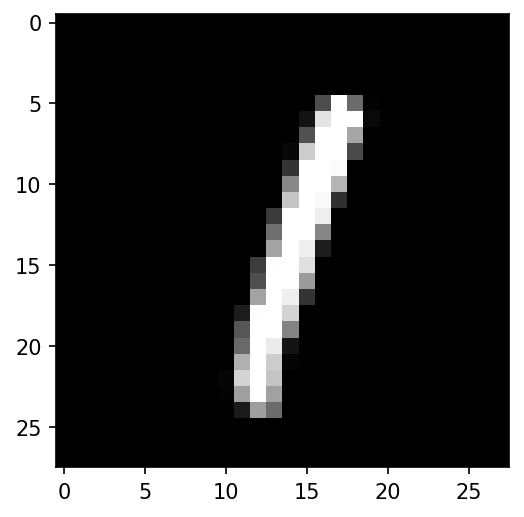

In [0]:
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Simple CNN with Cifar data

In [0]:
# define a model

def modelSimpleCNN(num_classes=10, input_shape=(28, 28)):
  model = Sequential()
  model.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPool2D())
  model.add(Conv2D(filters=56, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  
  return model

In [0]:
# compile the model

model = modelSimpleCNN(input_shape=(32, 32, 3))

learning_rate = 0.0001

loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate)

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [0]:
epochs = 10
batch_size = 32

start = timer()
history = model.fit(cifar_train_norm, cifar_train_labels, batch_size=batch_size, epochs=epochs, validation_data=(cifar_test_norm, cifar_test_labels), shuffle=True)

end = timer()
print(timedelta(seconds=end-start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.8733 - accuracy: 0.3337 - val_loss: 1.6338 - val_accuracy: 0.4297
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.5461 - accuracy: 0.4553 - val_loss: 1.4645 - val_accuracy: 0.4874
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.4264 - accuracy: 0.5000 - val_loss: 1.3803 - val_accuracy: 0.5146
Epoch 4/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.3613 - accuracy: 0.5214 - val_loss: 1.3477 - val_accuracy: 0.5291
Epoch 5/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.3159 - accuracy: 0.5390 - val_loss: 1.3121 - val_accuracy: 0.5396
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.2801 - accuracy: 0.5533 - val_loss: 1.2789 - val_accuracy: 0.5498
Epoch 7/10
50000/50000 [==============================] 

## Task 1 — visualize learning / result of the newtork above

## Task 2 — train a similar classifier on Fashion Mnist data